<a href="https://colab.research.google.com/github/aayushme/Aayush_AI_Squad_Project1/blob/master/Musical_Instrumets_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Kaggle Database***

**Calling Required Libraries**

In [1]:
import os
import pandas as pd

**Importing Kaggle.json**

In [2]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


**Kaggle Cred**


In [3]:
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

**Downloading Database**

In [4]:
!kaggle datasets download -d aayushme/music-instruments-classification

 78% 17.0M/21.7M [00:00<00:00, 25.0MB/s]
100% 21.7M/21.7M [00:00<00:00, 37.1MB/s]


In [ ]:
!unzip "*.zip"

In [6]:
os.listdir("instruments_data")

['piano',
 'drums',
 'saxophone',
 'acoustic_guitar',
 'flute',
 'violen',
 'harp',
 'tabla',
 'bass_guitar',
 'gramophone']

#**Data Augmentation**

**Importing Libraries**

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)

**Callling Transform Function and creating data class**

In [8]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("instruments_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())
data.classes

['acoustic_guitar',
 'bass_guitar',
 'drums',
 'flute',
 'gramophone',
 'harp',
 'piano',
 'saxophone',
 'tabla',
 'violen']

**Counting Number of images before Augmentation**

In [9]:
total = 0
for c in enumerate(data.classes):
    images = os.listdir("instruments_data/"+str(c[1]))
    print(c[1])
    total = total+len(images)
    print(len(images) )

print("Total Images")
print(total)

acoustic_guitar
389
bass_guitar
262
drums
309
flute
178
gramophone
384
harp
415
piano
223
saxophone
374
tabla
338
violen
342
Total Images
3214


**
**

**Dihedral Function**

In [10]:
def apply_dihedral(image, folder, name):
  img_counter = folder + '/' + 'dihedral' + str(name.split('.')[0])
  idx = 0
  for i in range(1,5,3):
    new_img = dihedral(image, i)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1



**Brightness Function**

In [11]:
def change_brightness(image, folder, name):
  img_counter = folder + '/' + 'brightness' + str(name.split('.')[0])
  idx = 0
  for change in np.linspace(0.2,0.8,2):
    new_img = brightness(image, change)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1

**Calling the Dihedral and Brightness Functions**

In [ ]:

for c in enumerate(data.classes):
  images = os.listdir("instruments_data/"+str(c[1]))

  for img in images:
    
    #Try and catch statments for error detection

    try:
      change_brightness(open_image("instruments_data/"+str(c[1])+"/"+img),"instruments_data/"+str(c[1]) , img)
      print("Done Brighntess Changes")

    except:
      print("Not Done Brightness Changes")

    try:
      apply_dihedral(open_image("instruments_data/"+str(c[1])+"/"+img),"instruments_data/"+str(c[1]) , img)
      print("Done Dihedral Changes")

    except:
      print("Not Done Dihedral Changes")


**Counting Images After Augmentation**

In [13]:
total = 0
for c in enumerate(data.classes):
    images = os.listdir("instruments_data/"+str(c[1]))
    print(c[1])
    total = total+len(images)
    print(len(images) )

print("Total Images")
print(total)

acoustic_guitar
1929
bass_guitar
1274
drums
1509
flute
750
gramophone
1832
harp
1995
piano
1091
saxophone
1742
tabla
1678
violen
1654
Total Images
15454


#**Training Model**

**Show Data**

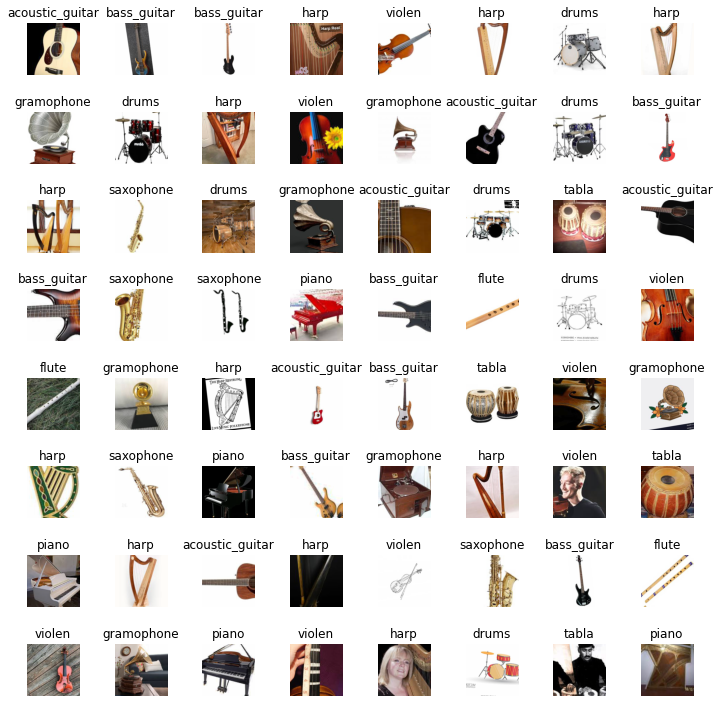

In [16]:
data.show_batch(rows=10, figsize=(10,10))

**Calling Resnet50 into learn variable**

In [17]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


**Training the data**

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.647179,0.149594,0.962617,00:33
1,0.313199,0.201886,0.947040,00:32
2,0.185268,0.143295,0.968847,00:32
3,0.124781,0.141390,0.967290,00:32


**Plotting The Learning Rate**

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


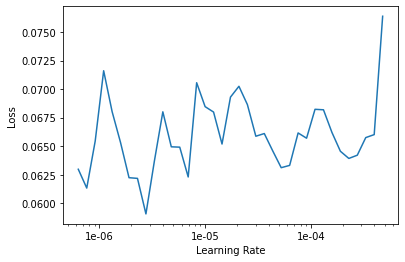

In [19]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

**Saving The state with name `Stage-1`**

In [20]:
os.makedirs("/content/export_values",exist_ok=True)
my_dir = "/content/export_values"

In [21]:
learn.save(my_dir+"/Music_Stage-1")

**Export stage-1**

In [22]:
learn.export(my_dir+"/Music_export.pkl")

**Upload `export.pkl`**

In [24]:
!pip install -U kora
from kora.drive import upload_public
url_is = upload_public(my_dir+"/Music_export.pkl")
url_is

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.4.23)


'https://drive.google.com/uc?id=1EWlOTudnzu4jB-GjQoM2YE3i3a9rW-se'

**Upload `Stage-1.pth`**

In [25]:
from kora.drive import upload_public
url_of = upload_public(my_dir+"/Music_Stage-1.pth")
url_of

'https://drive.google.com/uc?id=1wxu_Khbkf3XZoQ5xc5ENi1QAwYp2cnIH'